# sustainability_topic_modeling

In [1]:
#Load in nlp pipeline

#import sustainability_nlp_pipeline
from sustainability_nlp_pipeline import nlp_pipeline as nlp_func
from sustainability_nlp_pipeline import cleaned_text

In [2]:
#Load in other packages

import re
import pandas as pd
import pickle
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD

In [3]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Connect to MongoDB

from pymongo import MongoClient
client = MongoClient()
db = client.environment
sustainability_collection = db.sustainability

Create Regex Pattern Specific to Twitter Language:

In [ ]:
'''

Tweet Tokenizer Adapted from :  https://github.com/adonoho/TweetTokenizers/blob/master/PottsTweetTokenizer.py
   
This Tokenizer preserves Twitter language including:  usernames, hashtags, symbols html, etc.

'''

regex_code = (

    r"""(?:<[^>]+>)""",                             # HTML tags
    r"""(?:http[s]?://t.co/[a-zA-Z0-9]+)""",        # URLs 
    r"""(?:http[s]\S+?)""",                         # URLs
    r"""(?:@[\w_]+)""",                             # Twitter username
    r"""(?:\#+[\w_]+[\w\'_\-]*[\w_]+)""",           # Twitter hashtags
    r"""(?:\$[a-zA-Z]{1,6}([._][a-zA-Z]{1,2})?)""", # Twitter symbols / cashtags
    r"""(?:[a-z][a-z'\-_]+[a-z])""",                # Words with apostrophes or dashes
    r"""(?:[+\-]?\d+[,/.:-]\d+[+\-]?)""",           # Numbers, including fractions, decimals
    r"""(?:[\w_]+)""",                              # Words without apostrophes or dashes
    r"""(?:\.(?:\s*\.){1,})"""                      # Ellipsis
    )

#regex_text = re.sub(r'[%s]'% (regex_pattern), ' ')

#regex_pattern = re.compile(r"""(%s)"""%"|".join(regex_code), re.VERBOSE | re.I | re.UNICODE)

In [ ]:
#print(regex_pattern.pattern)

In [ ]:
#regex_tokenizer = RegexpTokenizer(pattern=regex_pattern.pattern,gaps=True, discard_empty = True)

Define Stop Words:

In [5]:
stop_words = stopwords.words('english')

#Add additional stop words in here:

additional_stop_words = ['RT', 'rt', "’", "retweet", "sustainability", "sustainable", "sustainabl", "sustain"]

total_stop_words = stop_words + additional_stop_words

**Define Parameters to use in NLP Function**

In [8]:
#TF-IDF

nlp_tfidf = nlp_func(vectorizer=TfidfVectorizer(min_df=2, max_df=0.5, stop_words = total_stop_words), 
                     cleaning_function=cleaned_text, tokenizer=TreebankWordTokenizer().tokenize)#, stemmer=PorterStemmer())

In [9]:
english_cursor = sustainability_collection.aggregate([{'$match': {'lang': 'en'}}])#{'$sample':{'size':5}}
generate_text = (x['text'] for x in english_cursor)
nlp_tfidf.fit_vectorizer(generate_text)

In [10]:
english_cursor = sustainability_collection.aggregate([{'$match': {'lang': 'en'}}])#{'$sample':{'size':5}}
generate_text = (x['text'] for x in english_cursor)
tfidf_tweet = nlp_tfidf.transform_vectorizer(generate_text)
#tfidf_tweet.toarray()

In [17]:
#Look at words (vector columns) using TFIDF

nlp_tfidf.vectorizer.get_feature_names()

['aaa',
 'aaj',
 'aapgeducation',
 'aarhus',
 'ab',
 'abetz',
 'abilities',
 'ability',
 'able',
 'ablebodied',
 'abo',
 'abolition',
 'abou',
 'absolute',
 'absolutely',
 'abstract',
 'abundant',
 'abused',
 'abuzz',
 'ac',
 'academic',
 'academics',
 'academy',
 'acc',
 'acceleration',
 'accelerator',
 'accepting',
 'access',
 'accessible',
 'accessing',
 'accidentsincluding',
 'accommodation',
 'according',
 'account',
 'accountability',
 'accountable',
 'accounting',
 'accounts',
 'accuracy',
 'accurate',
 'ach',
 'achievable',
 'achieve',
 'achieved',
 'achievemen',
 'achievement',
 'achieves',
 'achieving',
 'acidity',
 'acknowledge',
 'acquire',
 'acquires',
 'acquisition',
 'acre',
 'across',
 'act',
 'acting',
 'action',
 'actionable',
 'actiononclimate',
 'actions',
 'actively',
 'activism',
 'activist',
 'activists',
 'activities',
 'activity',
 'actonclimate',
 'actor',
 'actually',
 'acu',
 'ad',
 'adam',
 'adams',
 'adapt',
 'adaptation',
 'adaptive',
 'adapts',
 'add',
 

In [18]:
#Count Vectorizer

nlp_cv = nlp_func(vectorizer=CountVectorizer(max_df=0.5, stop_words = total_stop_words), cleaning_function=cleaned_text, tokenizer=TreebankWordTokenizer().tokenize)#, stemmer=PorterStemmer())

In [19]:
english_cursor = sustainability_collection.aggregate([{'$match': {'lang': 'en'}}])#{'$sample':{'size':5}}
generate_text = (x['text'] for x in english_cursor)
nlp_cv.fit_vectorizer(generate_text)

In [20]:
english_cursor = sustainability_collection.aggregate([{'$match': {'lang': 'en'}}])#{'$sample':{'size':5}}
generate_text = (x['text'] for x in english_cursor)
cv_tweet = nlp_cv.transform_vectorizer(generate_text)
#cv_tweet.toarray()

In [21]:
#Look at words (vector columns) using Count Vectorizer

nlp_cv.vectorizer.get_feature_names()

['aaa',
 'aaj',
 'aapgeducation',
 'aarey',
 'aarhus',
 'ab',
 'aba',
 'abandoned',
 'abandons',
 'abb',
 'abc',
 'abdullah',
 'abetterbackpack',
 'abetz',
 'abhor',
 'abilities',
 'ability',
 'able',
 'ablebodied',
 'abnormally',
 'abo',
 'abolition',
 'abolt',
 'abou',
 'abp',
 'abroad',
 'absolute',
 'absolutely',
 'abstract',
 'abt',
 'abudh',
 'abudhabi',
 'abuja',
 'abundant',
 'abused',
 'abuzz',
 'ac',
 'acade',
 'academia',
 'academic',
 'academics',
 'academy',
 'acc',
 'accelerate',
 'acceleration',
 'accelerator',
 'accent',
 'accepting',
 'acces',
 'access',
 'accessible',
 'accessing',
 'accessoires',
 'accesstoenergy',
 'accidentally',
 'accidentsincluding',
 'accolade',
 'accommodation',
 'accommodations',
 'accomplishing',
 'accor',
 'according',
 'accorhotels',
 'account',
 'accountability',
 'accountable',
 'accounting',
 'accounts',
 'accredited',
 'accuracy',
 'accurate',
 'accuse',
 'accusecharge',
 'accused',
 'ace',
 'ach',
 'achievable',
 'achieve',
 'achieved'

Models

In [22]:
#Define Models

n_comp = 20

lda_cv_model = LatentDirichletAllocation(n_topics=20,
                                max_iter=10,
                                random_state=42,
                               learning_method='online')
lda_tfidf_model = LatentDirichletAllocation(n_topics=20,
                                max_iter=10,
                                random_state=42,
                               learning_method='online')
lsa_cv_model = TruncatedSVD(n_components=n_comp)
lsa_tfidf_model = TruncatedSVD(n_components=n_comp)
nmf_cv_model = NMF(n_components=n_comp)
nmf_tfidf_model = NMF(n_components=n_comp)

Fit / Transform Models:

In [23]:
lda_cv_data = lda_cv_model.fit_transform(cv_tweet)
lda_tfidf_data = lda_tfidf_model.fit_transform(tfidf_tweet)

/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [24]:
lsa_cv_data = lsa_cv_model.fit_transform(cv_tweet)
lsa_tfidf_data = lsa_tfidf_model.fit_transform(tfidf_tweet)

In [25]:
nmf_cv_data = nmf_cv_model.fit_transform(cv_tweet)
nmf_tfidf_data = nmf_tfidf_model.fit_transform(tfidf_tweet)

In [26]:
#Save this vectorized data for later:

with open ('vectorized_tfidfdata.pickle', 'wb') as to_write:
    pickle.dump(nmf_tfidf_data, to_write)

In [27]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [28]:
#LDA, Count Vectorizer:

display_topics(lda_cv_model,nlp_cv.vectorizer.get_feature_names(),10)


Topic  0
one, plastics, take, free, planet, local, eco, health, love, summer

Topic  1
solar, energy, support, daily, thanks, made, find, th, problem, system

Topic  2
new, cities, technology, many, smart, drive, footprint, digital, renewable, study

Topic  3
environment, food, csr, part, circulareconomy, plastic, waste, environmental, country, forum

Topic  4
use, global, new, costs, going, better, doesnt, offers, uk, come

Topic  5
need, drones, car, pilot, license, fly, approach, president, week, shared

Topic  6
green, important, go, people, social, city, always, place, project, leading

Topic  7
work, ai, development, top, countries, amp, key, iot, unique, put

Topic  8
plastic, climatechange, waste, sdgs, human, plasticpollution, home, comes, ocean, recycle

Topic  9
get, cool, online, walmart, san, st, acting, access, excellency, please

Topic  10
building, construction, making, first, innovation, fashion, check, big, work, amazing

Topic  11
amp, great, see, know, want, crypto

In [29]:
#LDA, TFIDF:

display_topics(lda_tfidf_model,nlp_tfidf.vectorizer.get_feature_names(),10)


Topic  0
go, idea, leading, leadership, day, young, long, blog, let, based

Topic  1
thanks, latest, daily, join, team, right, one, solutions, community, something

Topic  2
cc, city, next, ht, inspired, nature, better, multicultural, look, start

Topic  3
food, building, tech, construction, support, land, share, free, amazing, netherlands

Topic  4
first, important, technology, smart, eco, digital, systems, global, africa, projects

Topic  5
industry, drones, car, build, pilot, need, license, fly, iot, smartcity

Topic  6
reuse, else, used, students, co, agtech, learn, farmers, shared, many

Topic  7
job, company, hiring, recycling, forum, conservation, energy, buildings, design, like

Topic  8
environmental, pm, health, webinar, looking, use, forward, research, cool, ac

Topic  9
trains, unsustainable, cant, mondaymotivation, rtit, knowledge, prosperity, regeneration, biodegradable, overconsumption

Topic  10
trees, work, water, find, countries, top, cities, green, robotics, put

To

In [30]:
#LSA, Count Vectorizer:

display_topics(lsa_cv_model,nlp_cv.vectorizer.get_feature_names(),10)


Topic  0
amp, see, want, know, race, awareness, crypto, mining, shift, limited

Topic  1
iot, industry, build, plastic, smartcity, bigdata, components, cybersecurity, needed, machinelearning

Topic  2
plastic, waste, climatechange, sdgs, plastics, circulareconomy, plasticpollution, innovation, world, think

Topic  3
need, drones, car, pilot, license, fly, energy, great, amp, green

Topic  4
energy, solar, latest, green, amp, environment, thanks, new, reduce, tech

Topic  5
amp, great, latest, work, thanks, new, green, environment, countries, ai

Topic  6
food, land, human, beef, used, without, amp, ecosystems, generate, grassland

Topic  7
work, ai, countries, robotics, top, put, futureofwork, automation, robots, iiot

Topic  8
amp, innovation, new, changing, days, plasticfree, game, scientists, breaks, enzyme

Topic  9
land, innovation, food, days, changing, plasticfree, game, beef, without, scientists

Topic  10
environment, great, trees, meet, watch, see, new, ecology, techgood, wo

In [31]:
#LSA, TFIDF:

display_topics(lsa_tfidf_model,nlp_tfidf.vectorizer.get_feature_names(),10)


Topic  0
drones, fly, license, pilot, car, need, drone, rin, navigation, trees

Topic  1
components, cybersecurity, smartcity, machinelearning, build, bigdata, needed, iot, industry, infose

Topic  2
race, mathematical, elite, techie, limited, massive, mining, shift, crypto, awareness

Topic  3
plastic, waste, climatechange, circulareconomy, plastics, sdgs, think, reuse, else, oceans

Topic  4
latest, thanks, daily, green, energy, csr, news, environment, job, solar

Topic  5
energy, tech, solarenergy, skylights, costs, unique, reduce, cc, building, construction

Topic  6
enzyme, breaks, discovered, changing, game, innovation, scientists, days, plasticfree, te

Topic  7
work, countries, robotics, ai, top, put, robots, futureofwork, automation, iiot

Topic  8
think, meet, marketing, inspired, multicultural, satisfied, currentstate, client, another, environment

Topic  9
think, marketing, inspired, multicultural, meet, currentstate, satisfied, client, another, sdgs

Topic  10
land, human

In [32]:
#NMF, Count Vectorizer:

display_topics(nmf_cv_model,nlp_cv.vectorizer.get_feature_names(),10)


Topic  0
want, see, know, race, awareness, mining, shift, limited, crypto, elite

Topic  1
industry, iot, build, smartcity, components, bigdata, cybersecurity, needed, machinelearning, infose

Topic  2
plastic, waste, climatechange, sdgs, plastics, circulareconomy, plasticpollution, killing, warn, doctors

Topic  3
need, drones, car, pilot, license, fly, trees, drone, credit, navigation

Topic  4
energy, solar, renewableenergy, emissions, renewables, solarenergy, making, impact, unique, data

Topic  5
latest, thanks, daily, news, csr, job, opening, read, see, hiring

Topic  6
land, food, human, beef, used, without, ecosystems, generate, grassland, ruminants

Topic  7
work, ai, iot, countries, top, put, futureofwork, automation, robotics, robots

Topic  8
amp, countries, social, gmo, important, industry, food, part, engagement, environmental

Topic  9
plastic, innovation, days, plasticfree, changing, game, scientists, breaks, enzyme, discovered

Topic  10
great, see, need, article, job

In [33]:
#NMF, TFIDF:

display_topics(nmf_tfidf_model,nlp_tfidf.vectorizer.get_feature_names(),10)


Topic  0
drones, fly, license, pilot, car, need, drone, rin, navigation, credit

Topic  1
components, cybersecurity, smartcity, machinelearning, needed, build, bigdata, industry, iot, infose

Topic  2
mathematical, elite, techie, limited, massive, mining, shift, awareness, crypto, race

Topic  3
climatechange, plastic, waste, sdgs, plastics, plasticpollution, reuse, else, doctors, killing

Topic  4
latest, thanks, daily, csr, news, green, environment, opening, technology, solar

Topic  5
skylights, costs, unique, solarenergy, cc, reduce, tech, energy, greentech, plast

Topic  6
enzyme, breaks, discovered, changing, game, scientists, plasticfree, days, te, innovation

Topic  7
countries, robotics, ai, work, robots, put, top, futureofwork, automation, iiot

Topic  8
marketing, inspired, multicultural, meet, think, currentstate, satisfied, client, another, htt

Topic  9
world, get, economic, forum, congrats, hydrogen, germany, trains, techgood, country

Topic  10
land, food, ecosystems, 

In [37]:
print("Count Vectorized Words and Frequency: \n",nlp_cv.vectorizer.vocabulary_)

Count Vectorized Words and Frequency: 
 {'visit': 10933, 'concludes': 2052, 'week': 11097, 'stops': 9727, 'miami': 6491, 'caribbean': 1455, 'president': 7933, 'promote': 8053, 'melbourne': 6427, 'sydney': 10026, 'join': 5590, 'us': 10774, 'spfaustralia': 9554, 'learn': 5902, 'latest': 5850, 'trends': 10527, 'ehs': 3202, 'riskmanagement': 8703, 'vienna': 10897, 'well': 11111, 'qualityoflife': 8187, 'rankings': 8256, 'affordablehousing': 207, 'publictransport': 8124, 'apl': 468, 'achieved': 78, 'reduction': 8385, 'co': 1839, 'emissions': 3274, 'per': 7523, 'transported': 10494, 'container': 2147, 'kilometre': 5705, 'compared': 1998, 'read': 8288, 'hydroelectricity': 5036, 'may': 6363, 'appear': 479, 'relatively': 8457, 'clean': 1774, 'process': 7993, 'megadam': 6422, 'built': 1276, 'far': 3753, 'belomonte': 889, 'right': 8686, 'enviornment': 3408, 'also': 335, 'comes': 1937, 'immense': 5125, 'responsibility': 8592, 'ascitizens': 573, 'consumersproducerswe': 2138, 'thank': 10210, 'ha': 46

In [40]:
print("TFIDF Words and Frequency: \n",nlp_tfidf.vectorizer.vocabulary_)

TFIDF Words and Frequency: 
 {'visit': 6702, 'week': 6811, 'stops': 5951, 'miami': 3947, 'caribbean': 881, 'president': 4806, 'promote': 4885, 'melbourne': 3909, 'sydney': 6154, 'join': 3415, 'us': 6613, 'spfaustralia': 5834, 'learn': 3587, 'latest': 3554, 'trends': 6471, 'ehs': 1955, 'riskmanagement': 5295, 'well': 6822, 'rankings': 5012, 'affordablehousing': 123, 'publictransport': 4932, 'apl': 296, 'achieved': 43, 'reduction': 5094, 'co': 1115, 'emissions': 1998, 'per': 4558, 'transported': 6451, 'container': 1312, 'kilometre': 3477, 'compared': 1211, 'read': 5033, 'hydroelectricity': 3085, 'may': 3872, 'appear': 303, 'relatively': 5139, 'clean': 1070, 'process': 4844, 'megadam': 3908, 'built': 781, 'far': 2310, 'belomonte': 556, 'right': 5283, 'enviornment': 2092, 'also': 201, 'comes': 1173, 'immense': 3136, 'responsibility': 5229, 'thank': 6266, 'ha': 2850, 'new': 4186, 'study': 6005, 'suggests': 6039, 'seafood': 5477, 'consumers': 1305, 'across': 54, 'globe': 2691, 'united': 6566

Topic Modeling graph using py LDA vis

In [41]:
#Look at how this changes as I move number of topics

import pyLDAvis, pyLDAvis.sklearn
from IPython.display import display

pyLDAvis.enable_notebook()

vis = pyLDAvis.sklearn.prepare(lda_cv_model, cv_tweet, nlp_cv.vectorizer)

display(vis)

/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
15    -0.050061 -0.282783       1        1  7.021015
18     0.052813 -0.192653       2        1  6.460038
11     0.257828  0.088712       3        1  6.367869
3      0.275353  0.042727       4        1  6.270481
10    -0.000092 -0.125546       5        1  5.783282
1     -0.005903 -0.025771       6        1  5.777891
16    -0.003633 -0.049976       7        1  5.064882
0     -0.100774  0.060993       8        1  4.831427
17    -0.090962 -0.007105       9        1  4.819530
12    -0.020987 -0.098000      10        1  4.762686
4     -0.071820  0.066693      11        1  4.715550
7      0.047765 -0.061829      12        1  4.698196
2     -0.063762  0.065002      13        1  4.639010
13     0.002600  0.049893      14        1  4.543395
8      0.122732  0.049305      15        1  4.471282
6     -0.064514  0.071573      16        1  4.263789
19    -0.066564  0.076105      17        1  4.222953
5     -0.066172  0.077050      18        1  3.887167
9     -0.081278  0.096104      19        1  3.722155
14    -0.072569  0.099506      20        1  3.677403, topic_info=      Category        Freq           Term       Total  loglift  logprob
term                                                                   
380    Default  651.000000            amp  651.000000  30.0000  30.0000
4508   Default  373.000000          green  373.000000  29.0000  29.0000
6862   Default  354.000000           need  354.000000  28.0000  28.0000
7686   Default  524.000000        plastic  524.000000  27.0000  27.0000
4501   Default  416.000000          great  416.000000  26.0000  26.0000
5850   Default  351.000000         latest  351.000000  25.0000  25.0000
11292  Default  337.000000          world  337.000000  24.0000  24.0000
3417   Default  391.000000    environment  391.000000  23.0000  23.0000
11025  Default  349.000000          waste  349.000000  22.0000  22.0000
1804   Default  279.000000  climatechange  279.000000  21.0000  21.0000
6909   Default  446.000000            new  446.000000  20.0000  20.0000
5257   Default  268.000000       industry  268.000000  19.0000  19.0000
9436   Default  247.000000          solar  247.000000  18.0000  18.0000
4014   Default  279.000000           food  279.000000  17.0000  17.0000
10886  Default  288.000000            via  288.000000  16.0000  16.0000
11045  Default  228.000000          water  228.000000  15.0000  15.0000
10214  Default  291.000000         thanks  291.000000  14.0000  14.0000
5735   Default  245.000000           know  245.000000  13.0000  13.0000
5579   Default  210.000000            job  210.000000  12.0000  12.0000
9033   Default  318.000000            see  318.000000  11.0000  11.0000
1798   Default  211.000000        climate  211.000000  10.0000  10.0000
3338   Default  552.000000         energy  552.000000   9.0000   9.0000
10777  Default  203.000000            use  203.000000   8.0000   8.0000
4325   Default  180.000000            get  180.000000   7.0000   7.0000
4809   Default  227.000000           help  227.000000   6.0000   6.0000
6233   Default  233.000000           make  233.000000   5.0000   5.0000
10996  Default  255.000000           want  255.000000   4.0000   4.0000
4372   Default  178.000000         global  178.000000   3.0000   3.0000
1610   Default  176.000000         change  176.000000   2.0000   2.0000
11272  Default  300.000000           work  300.000000   1.0000   1.0000
...        ...         ...            ...         ...      ...      ...
6105   Topic20   94.176059           look   95.024175   3.2940  -3.6220
4996   Topic20   79.226727             ht   80.074886   3.2923  -3.7949
1520   Topic20   75.624829             cc   76.472945   3.2918  -3.8414
9325   Topic20   48.623858      skylights   49.472111   3.2857  -4.2831
7891   Topic20   38.336598      predicted   39.184723   3.2811  -4.5208
8152   Topic20   37.647005        purpose   38.495122  

**Cluster on Topics**

NMF

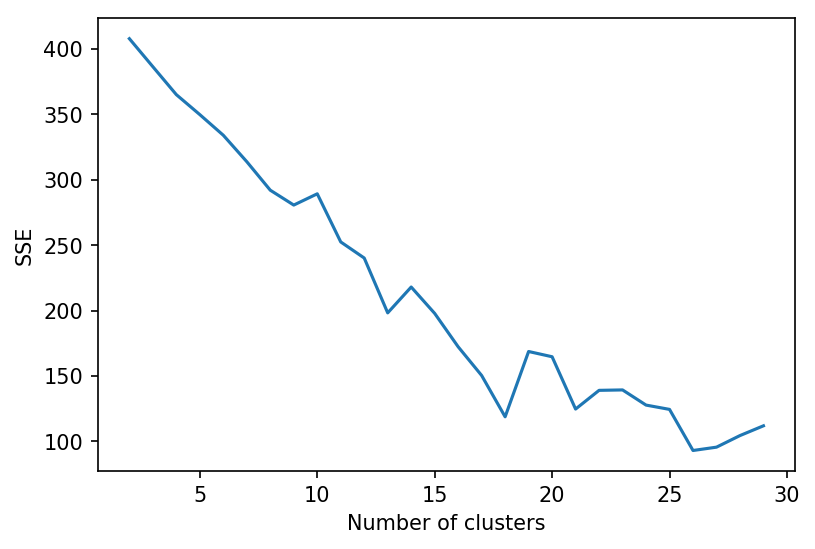

In [42]:
#Count Vectorizer

SSE = []

for k in range(2,30):
    km = MiniBatchKMeans(n_clusters = k, random_state = 42)
    km.fit(nmf_cv_data)
    labels = km.labels_
    SSE.append(km.inertia_)
    
plt.figure(dpi = 150)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.plot(range(2,30),SSE);
#plt.ylim((0,600))

plt.savefig("cluster_plot_cv")

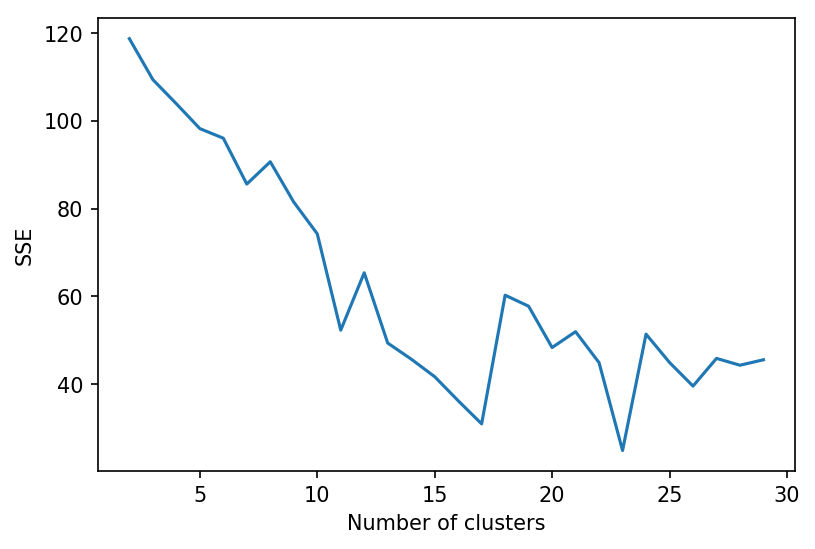

In [43]:
#TFIDF

SSE = []

for k in range(2,30):
    km = MiniBatchKMeans(n_clusters = k, random_state = 42)
    km.fit(nmf_tfidf_data)
    labels = km.labels_
    SSE.append(km.inertia_)
    
plt.figure(dpi = 150)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.plot(range(2,30),SSE);


plt.savefig("cluster_plot_tfidf")

In [44]:
km = MiniBatchKMeans(n_clusters=16)
nmf_clusters = km.fit_predict(nmf_cv_data)

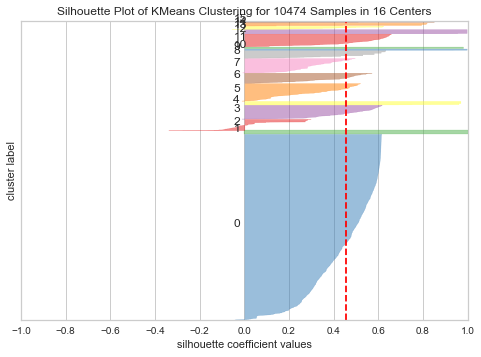

In [45]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
visualiser = SilhouetteVisualizer(KMeans(n_clusters=16))
visualiser.fit(nmf_cv_data)
visualiser.poof()

In [46]:
model = TSNE(n_components=2, random_state = 0, verbose = 0)
low_data = model.fit_transform(nmf_cv_data)

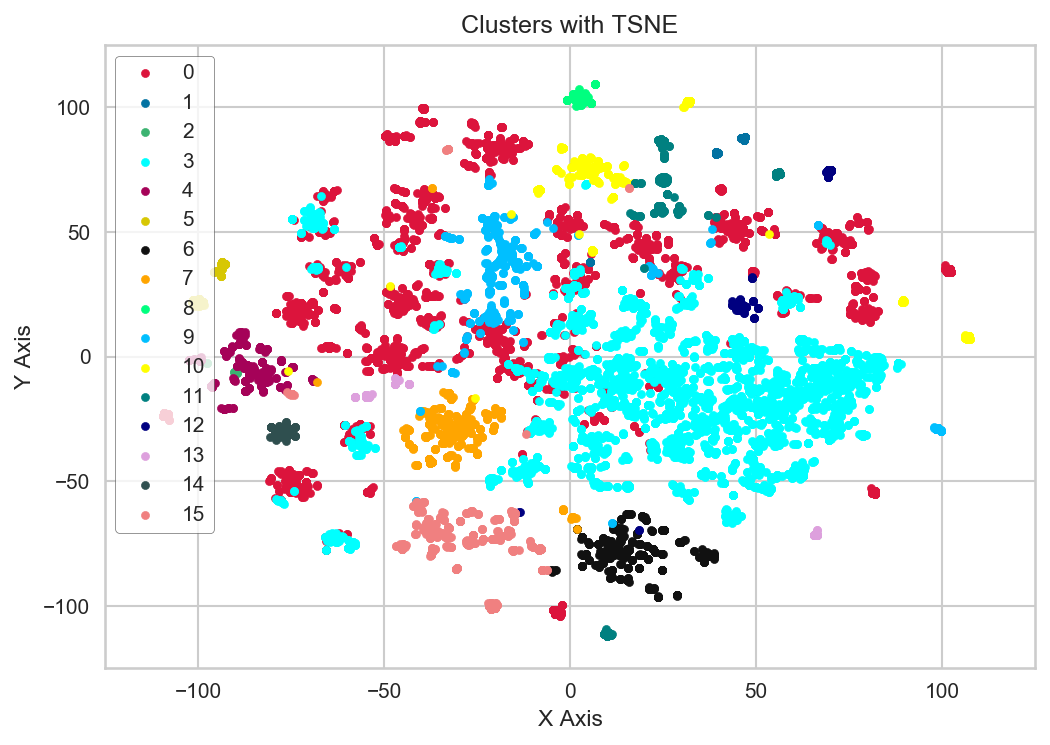

In [47]:
colors = (['crimson','b','mediumseagreen','cyan','m','y', 'k', 'orange', 'springgreen', 'deepskyblue', 'yellow', 'teal', 'navy', 'plum', 'darkslategray', 'lightcoral', 'papayawhip'])
plt.figure(dpi = 150)

for i, c, label in zip (range(16), colors, list(range(16))):
    plt.scatter(low_data[nmf_clusters == i, 0], low_data[nmf_clusters == i, 1], c=c, label = label, s = 15, alpha = 1)

plt.legend(fontsize = 10, loc = 'upper left', frameon = True, facecolor = '#FFFFFF', edgecolor = '#333333');
plt.title("Clusters with TSNE", fontsize = 12);
plt.xlim(-125,125);
plt.ylim(-125,125);
plt.ylabel("Y Axis");
plt.xlabel("X Axis");
plt.yticks(fontsize =10);
plt.xticks(fontsize = 10);

In [48]:
km_tfidf = MiniBatchKMeans(n_clusters=16)
nmf_tfidf_clusters = km_tfidf.fit_predict(nmf_tfidf_data)

In [54]:
with open ('sustainability_clusters.pickle', 'wb') as to_write:
    pickle.dump(nmf_tfidf_clusters, to_write)

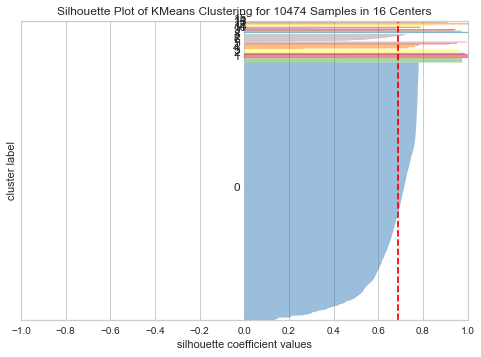

In [50]:
visualiser_tfidf = SilhouetteVisualizer(KMeans(n_clusters=16))
visualiser_tfidf.fit(nmf_tfidf_data)
visualiser_tfidf.poof()

In [51]:
model_2 = TSNE(n_components=2, random_state = 0, verbose = 0)
low_data_2 = model_2.fit_transform(nmf_tfidf_data)

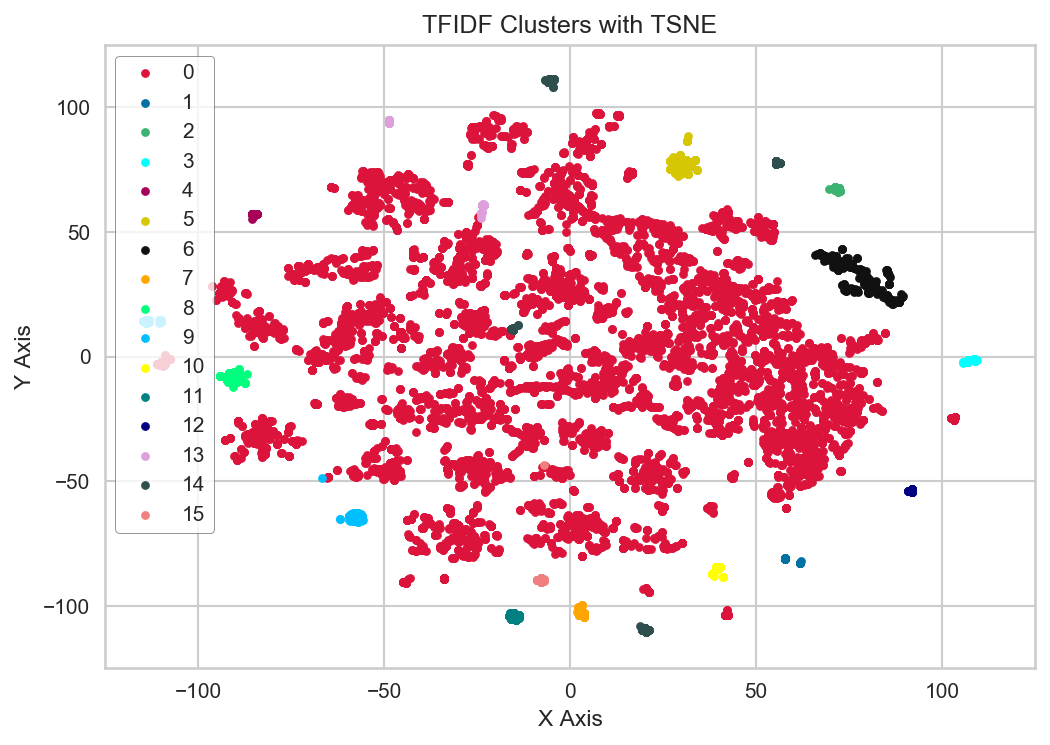

In [52]:
colors = (['crimson','b','mediumseagreen','cyan','m','y', 'k', 'orange', 'springgreen', 'deepskyblue', 'yellow', 'teal', 'navy', 'plum', 'darkslategray', 'lightcoral', 'papayawhip'])

plt.figure(dpi = 150)

for i, c, label in zip (range(16), colors, list(range(16))):
    plt.scatter(low_data_2[nmf_tfidf_clusters == i, 0], low_data_2[nmf_tfidf_clusters == i, 1], c=c, label = label, s = 15, alpha = 1)

plt.legend(fontsize = 10, loc = 'upper left', frameon = True, facecolor = '#FFFFFF', edgecolor = '#333333');
plt.title("TFIDF Clusters with TSNE", fontsize = 12);
plt.xlim(-125,125);
plt.ylim(-125,125);
plt.ylabel("Y Axis");
plt.xlabel("X Axis");
plt.yticks(fontsize =10);
plt.xticks(fontsize = 10);

In [47]:
tsne_new = TSNE(n_components=2, random_state = 0, verbose = 0).fit_transform(nmf_tfidf_data)

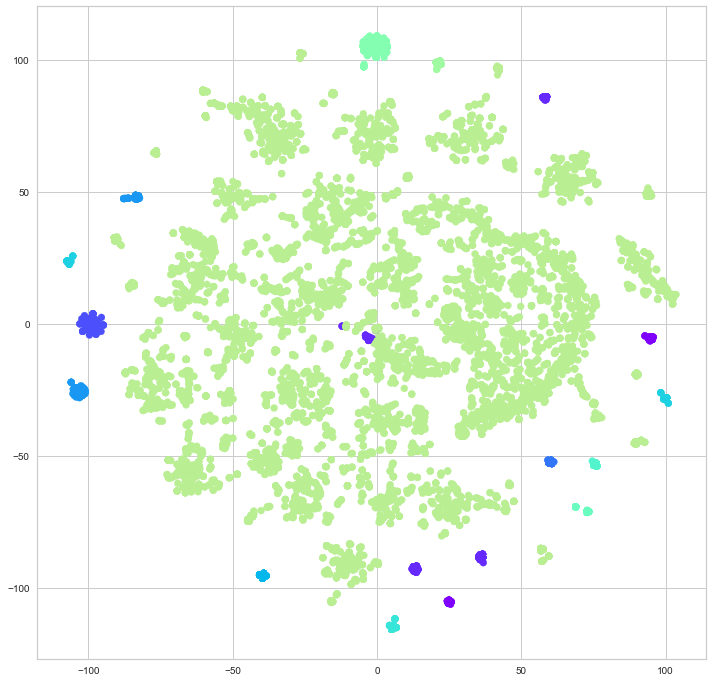

In [127]:
clus = KMeans(n_clusters=16,random_state=42)
labels = clus.fit_predict(nmf_tfidf_data)

plt.figure(figsize=(12,12))
plt.scatter(tsne_new[:,0],tsne_new[:,1],c=plt.cm.rainbow(labels*13))

In [54]:
def get_tweets(nmf_tfidf_data, nmf_tfidf_clusters, idx):
    df = pd.DataFrame(nmf_tfidf_clusters, columns = ['cluster'])
    df = df[df['cluster'] == nmf_tfidf_clusters[idx]]
    
    return(list(df.sample(10).index)) #Returns list of 10 indices with tweets in the same cluster

In [55]:
recommended_tweets = get_tweets(nmf_tfidf_data, nmf_tfidf_clusters, 30)

In [56]:
def print_tweets(idx,recommended_tweets):
    print(sustainability_collection.find()[idx]['text'])
    print('\n------\n')
    for rec_idx in recommended_tweets:
        print('\n --- Result --- \n')
        print(sustainability_collection.find()[rec_idx]['text'])

In [62]:
def show_tweets(index_num):
    recommended_tweets = get_tweets(nmf_tfidf_data, nmf_tfidf_clusters, index_num)
    print_tweets(index_num, recommended_tweets)

In [63]:
show_tweets(1)

Are you in Melbourne or Sydney? Join us at #SPFAustralia to learn about the latest trends in #EHS, #RiskManagement… https://t.co/BG7eWM1FCO

------


 --- Result --- 

RT @BridgmanLscapes: #Greenroofs help to achieve a range of #Sustainability outcomes from improving wellbeing and staff morale to reducing…

 --- Result --- 

Great to see the new initiative started by @Visa in supporting female, low-income entrepreneurs across the globe in… https://t.co/b1yW66Ptcd

 --- Result --- 

Interesting things afoot in the world of #sustainability - we need initiatives like these on all fronts! Shoe with… https://t.co/EeEurKyfnx

 --- Result --- 

#GreenHashes #GH #Green #Mining #ICO #airdrop

 --- Result --- 

RT @RSPBintheEast: Have you seen any swifts flying high around rooftops? These high fliers even find nesting sites at this height! https://…

 --- Result --- 

RT @DowCorps: 🏎 The @WEmovement &amp; @RCRracing and Dow logos are speeding around the track today as we partner to drive interes

In [57]:
index_num = 1

recommended_tweets = get_tweets(nmf_tfidf_data, nmf_tfidf_clusters, index_num)
print_tweets(index_num, recommended_tweets)

Are you in Melbourne or Sydney? Join us at #SPFAustralia to learn about the latest trends in #EHS, #RiskManagement… https://t.co/BG7eWM1FCO

------


 --- Result --- 

RT @ColinLeMahieu: Partnership between $nano and sustainability confirmed. https://t.co/U2YHNXZAFJ

 --- Result --- 

Want to work in #Portland, OR? View our latest opening: https://t.co/oU2oqv1lYn #energy #utilities #sustainability… https://t.co/RaW6XjlU50

 --- Result --- 

RT @FBaddache: Good overview of #ImpactInvesting in Southeast Asia, with focus on #Indonesia #Philippines #Vietnam. 

#Sustainability #Clim…

 --- Result --- 

GPRO Fundamentals of Green Building Training, August 15-29, Los Angeles, CA https://t.co/bkcEqrOdX2 @USGBC @USGBCLA… https://t.co/QQYMpjP0P5

 --- Result --- 

RT @VeganYogaDude: WATCH #video:
2 drones plant 100,000 trees per day.
#drones #trees #Innovation
 #Sustainability #Greentech #Tech https:/…

 --- Result --- 

#ZeroCarbonProject #Crypto #Blockchain #ENERGIS #bitcoin #cryptocurrency #b

In [58]:
index_num = 6

recommended_tweets = get_tweets(nmf_tfidf_data, nmf_tfidf_clusters, index_num)
print_tweets(index_num, recommended_tweets)

RT @thefishsite: A new study suggests seafood consumers across the globe are united in thinking that the biggest threat to the oceans is po…

------


 --- Result --- 

RT @natureandmore: A great blog about Ekoplaza's plastic free supermarket and our Natural Branding approach @Ekoplaza https://t.co/iI7p5hn8…

 --- Result --- 

Great #sustainability story by ⁦@yalmazsiddiqui⁩ about ⁦@MGMGrand⁩ and their commitment to getting to zero waste.… https://t.co/Ghp9VMe6fr

 --- Result --- 

Want to work in #Asheville, NC? View our latest opening: https://t.co/Mzh9VjrRgU #Conservation #Sustainability… https://t.co/irXfSjkx5L

 --- Result --- 

RT @Eat_Out: The proof of these products are in the pudding: "Chefs will phone us to come see and taste the difference between dishes made…

 --- Result --- 

RT @CaelusGreenRoom: How a B.E.E.R. Can Benefit Your System: A Parkson Corp. Video Debut https://t.co/xWojyM9fEY #sustainability #csr #green

 --- Result --- 

RT @evankirstel: 🌊 🌞 #Sustainability ht

In [59]:
index_num = 4000

recommended_tweets = get_tweets(nmf_tfidf_data, nmf_tfidf_clusters, index_num)
print_tweets(index_num, recommended_tweets)

By now it is clear that there will be no outer #Sustainability without inner #Transformation. The mainstream model… https://t.co/oQvSpFNYfV

------


 --- Result --- 

RT @ThePlanetEarth: The latest Climate Change Exchange! https://t.co/7nqmSMHq2F Thanks to @Bentler @TheGreenMBA @OnlytheLonely18 #sustainab…

 --- Result --- 

Very cool! RT+@techprofit: Would you use the plastic road in Netherlands?

#innovation #Sustainability #cleantech… https://t.co/zP6L7icGdO

 --- Result --- 

RT @MattPrivratsky: “Mitra Jalali Nelson has laid out real concrete plans to address housing affordability, police accountability, and tran…

 --- Result --- 

RT @comcast: We’re committed to creating a green future. @Sjindavis, our Chief #Sustainability Officer, has challenged us to start working…

 --- Result --- 

Wonderful ingenuity from Netherlands - the plastic road lasts three times as long as a standard one. Watching with… https://t.co/GoggCg872F

 --- Result --- 

RT @thyssenkrupp_en: #ecologicalfoot

In [60]:
index_num = 9000

recommended_tweets = get_tweets(nmf_tfidf_data, nmf_tfidf_clusters, index_num)
print_tweets(index_num, recommended_tweets)

[Job] Energy Analyst | Company: Emory University | Location: Atlanta GA Georgia United States | #Atlanta… https://t.co/TPBF1ApSq2

------


 --- Result --- 

RT @MastercardNews: Mastercard Secret to #Sustainability no. 1: #FinancialInclusion: For us, it's not just about access. It's about #Dignit…

 --- Result --- 

Zebras, buffalos and lions are teaching the @YouGlo participants about #sustainability and making a positive impact… https://t.co/RdSa8gspFF

 --- Result --- 

The UK should definitely use this idea! #Sustainable #SustainableShopping #SustainableFuture

 --- Result --- 

Only TWO weeks left!! ⏳⌛️   #energycaretech #nest #nestlearningthetmostat #FPL #google #nestthermostatE #Nestpro… https://t.co/yX6ZNaB9mH

 --- Result --- 

Posted by @FrankOUNL I think that the supporters of @KateRaworth’s ideas miss some or the points, believing it poss… https://t.co/ygSOb9clqF

 --- Result --- 

Picked up a copy of the #Elle September issue yet? It addresses how the fashion industry and 

In [61]:
index_num = 3500

recommended_tweets = get_tweets(nmf_tfidf_data, nmf_tfidf_clusters, index_num)
print_tweets(index_num, recommended_tweets)

RT @pokitocup: pokito -  saving space and the planet - one drink at a time! #plasticfree #coffee #pokito #Sustainability #sustainableLiving…

------


 --- Result --- 

11 Stylish, Sustainable Straws to Help You Cut Down on Single-Use Plastic - https://t.co/NKcXwzW5eA #Sustainability… https://t.co/Oxr7HqbfK5

 --- Result --- 

RT @dtdchange: Can Ecuador do palm oil right? Jurisdictional RSPO commitment stirs hope 
https://t.co/w7oJVTJU6k 
The plan aims to certify…

 --- Result --- 

RT @wiomax: #Disruption(s) in the #SharedMobility Industry: #DocklessBike, #Scooter Programs https://t.co/MSnqHynSQg #bikesharing #smartmob…

 --- Result --- 

Here, resident digital printing expert Debbie McKeegan shares the need for true supply chain sustainability in the… https://t.co/OhHo3SGXrD

 --- Result --- 

RT @arlenenewbigg: What Components do we need to build a #SmartCity?

#CyberSecurity #IoT #5G #Industry40 #MachineLearning #BigData #M2M #f…

 --- Result --- 

Real world #CSR - #Walmart wants 